In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing and Understanding the Dataset

In [3]:
df=pd.read_csv('super store_project.csv')

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [6]:
df['Sales'].describe()

count     9800.000000
mean       230.769059
std        626.651875
min          0.444000
25%         17.248000
50%         54.490000
75%        210.605000
max      22638.480000
Name: Sales, dtype: float64

In [7]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [8]:
df['Ship Mode'].value_counts()

Ship Mode
Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: count, dtype: int64

**Standard Class** (5,859 orders): This shipping mode is the most commonly used, likely because it is cost-effective or part of the default option for many customers.

**Second Class** (1,902 orders): This is a mid-tier shipping option that might offer faster delivery than Standard Class but at a higher cost.

**First Class** (1,501 orders): This is a premium shipping option, offering quicker delivery times, possibly with added benefits like tracking or insurance.

**Same Day** (538 orders): This is the least used shipping mode, which likely offers the fastest delivery but at a significantly higher cost, making it less popular.

In [9]:
df['Segment'].value_counts()

Segment
Consumer       5101
Corporate      2953
Home Office    1746
Name: count, dtype: int64

In [10]:
df['State'].value_counts()[:5]

State
California      1946
New York        1097
Texas            973
Pennsylvania     582
Washington       504
Name: count, dtype: int64

In [11]:
df.shape

(9800, 18)

In [12]:
df['City'].value_counts()

City
New York City        891
Los Angeles          728
Philadelphia         532
San Francisco        500
Seattle              426
                    ... 
Hagerstown             1
Arlington Heights      1
East Orange            1
San Luis Obispo        1
Springdale             1
Name: count, Length: 529, dtype: int64

# Preprocessing

In [13]:
df.isna().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [14]:
# df=df.drop(columns=['Row ID', 'Order ID','Customer ID','Country','Postal Code','Product ID'])

In [15]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')

# Visualization

In [16]:
region_sales = df.groupby('Region')['Sales'].sum()
region_sales

Region
Central    492646.9132
East       669518.7260
South      389151.4590
West       710219.6845
Name: Sales, dtype: float64

([<matplotlib.patches.Wedge at 0x1f63e51b230>,
 [Text(0.8523090615228606, 0.6953914463422892, 'Central'),
  Text(-0.7318921319184329, 0.8211783650559065, 'East'),
  Text(-0.890242851576143, -0.6461173772756599, 'South'),
  Text(0.6066866963598533, -0.9175681187028937, 'West')],
 [Text(0.464895851739742, 0.37930442527761227, '21.8%'),
  Text(-0.399213890137327, 0.4479154718486762, '29.6%'),
  Text(-0.4855870099506234, -0.35242766033217804, '17.2%'),
  Text(0.3309200161962836, -0.5004917011106692, '31.4%')])

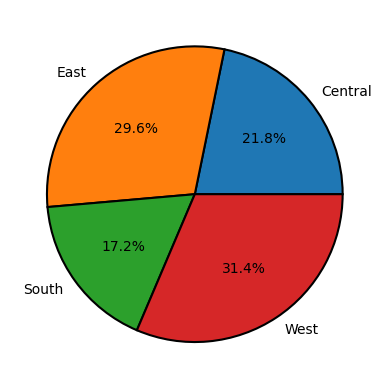

In [17]:
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%',wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})

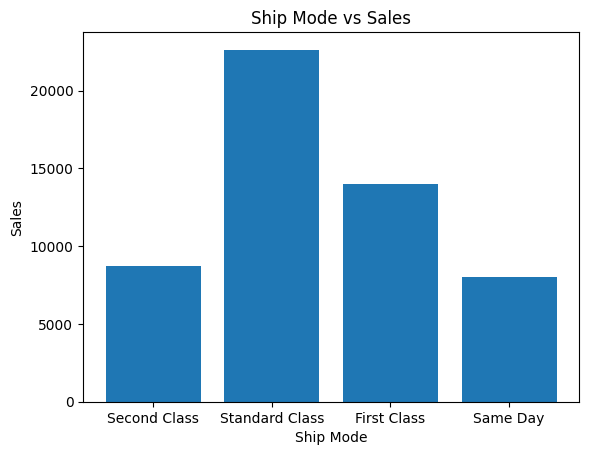

In [18]:
plt.bar(df['Ship Mode'],df['Sales'])
plt.title('Ship Mode vs Sales')
plt.xlabel('Ship Mode')
plt.ylabel('Sales')
plt.show()

In [19]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [20]:
sales_state=df.groupby('State')['Sales'].sum().sort_values(ascending=False)[:10]
sales_state

State
California      446306.4635
New York        306361.1470
Texas           168572.5322
Washington      135206.8500
Pennsylvania    116276.6500
Florida          88436.5320
Illinois         79236.5170
Michigan         76136.0740
Ohio             75130.3500
Virginia         70636.7200
Name: Sales, dtype: float64

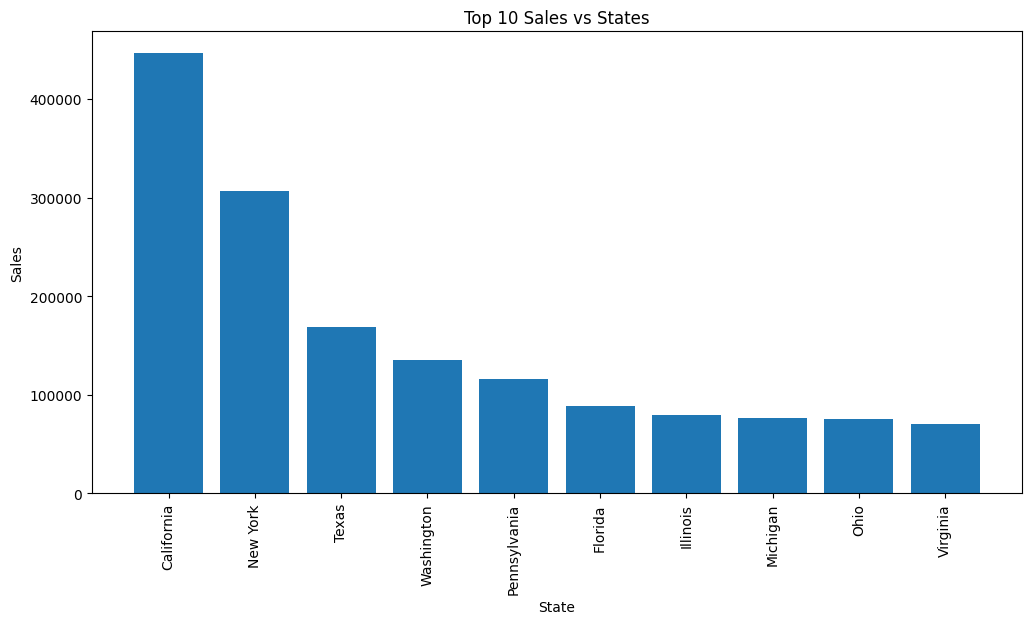

In [21]:
plt.figure(figsize=(12,6))
plt.bar(sales_state.index,sales_state)
plt.title("Top 10 Sales vs States")
plt.xlabel('State')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.show()

In [22]:
df['delivery time']=df['Ship Date']-df['Order Date']
df['delivery time']

0      3 days
1      3 days
2      4 days
3      7 days
4      7 days
        ...  
9795   7 days
9796   5 days
9797   5 days
9798   5 days
9799   5 days
Name: delivery time, Length: 9800, dtype: timedelta64[ns]

In [24]:
df.groupby('Ship Mode')['delivery time'].mean()

Ship Mode
First Class      2 days 04:18:04.077281812
Same Day         0 days 01:04:14.275092936
Second Class     3 days 05:58:51.861198738
Standard Class   5 days 00:12:02.580645161
Name: delivery time, dtype: timedelta64[ns]

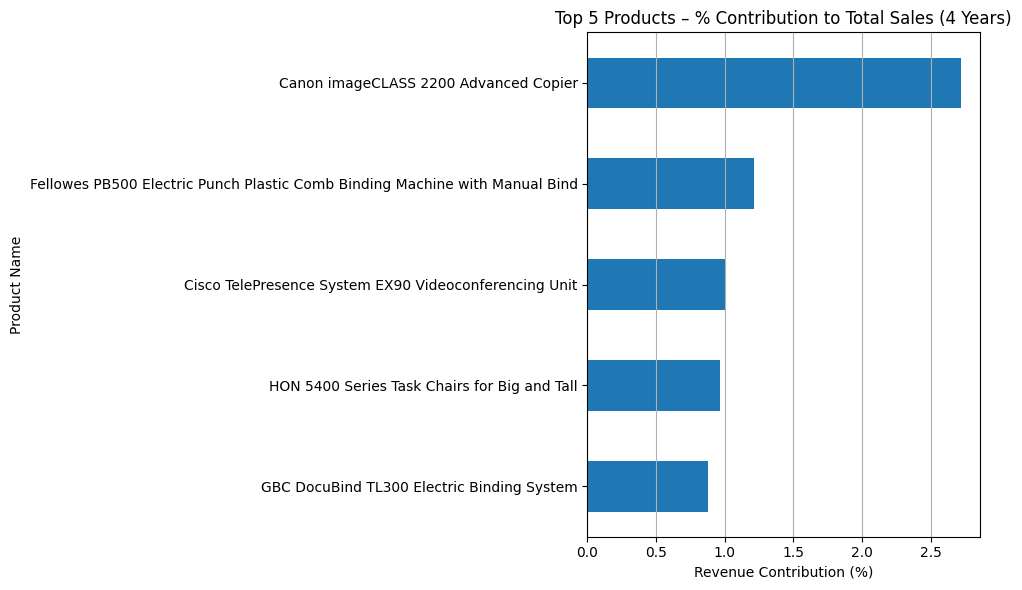

In [ ]:
# Ensure datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Total sales across all products and all 4 years
total_sales_all = df['Sales'].sum()

# Top 5 products by total sales (4 years)
top5_sales = (
    df.groupby('Product Name')['Sales']
      .sum()
      .sort_values(ascending=False)
      .head(5)
)

# Percentage contribution to total sales (all products, all years)
top5_percentage = (top5_sales / total_sales_all) * 100

plt.figure(figsize=(10, 6))
top5_percentage.sort_values().plot(kind='barh')

plt.title('Top 5 Products – % Contribution to Total Sales (4 Years)')
plt.xlabel('Revenue Contribution (%)')
plt.ylabel('Product Name')
plt.grid(axis='x')
plt.tight_layout()
plt.show()



In [36]:
print(f"Percentage revenue of 5 products: {top5_percentage.sum()}\nTotal unique products: {df['Product ID'].nunique()}")

Percentage revenue of 5 products: 6.782367820561205
Total unique products: 1861


C:\Users\MANU & MANI\AppData\Local\Temp\ipykernel_5580\3625238530.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  order_count = df_time.resample('M')['Order ID'].nunique()


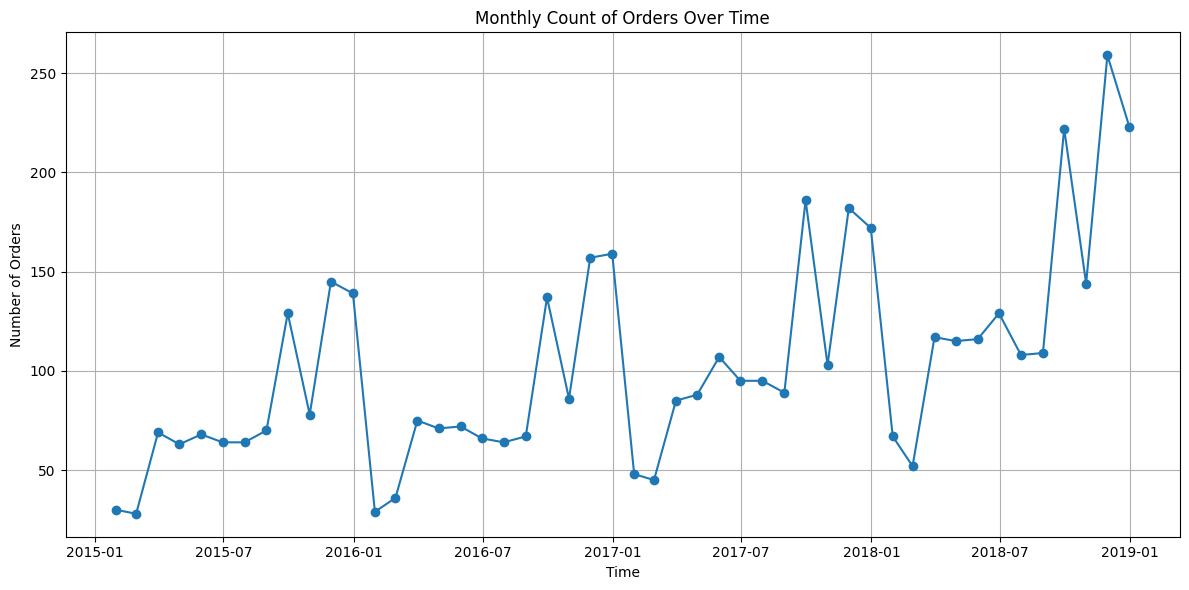

In [37]:
# Set date as index
df_time = df.set_index('Order Date')

# Count unique Order IDs per month
order_count = df_time.resample('M')['Order ID'].nunique()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(order_count.index, order_count.values, marker='o')

plt.title('Monthly Count of Orders Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Orders')
plt.grid()
plt.tight_layout()
plt.show()


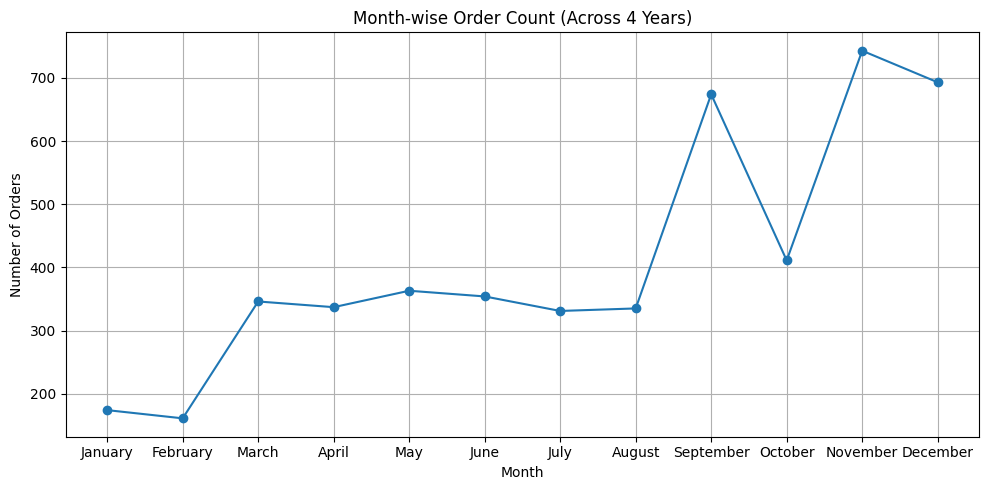

In [38]:
# Extract month
df['Month'] = df['Order Date'].dt.month
df['Month Name'] = df['Order Date'].dt.month_name()

# Count unique Order IDs per month (across all years)
month_order_count = (
    df.groupby(['Month', 'Month Name'])['Order ID']
      .nunique()
      .reset_index()
      .sort_values('Month')
)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(month_order_count['Month Name'],
         month_order_count['Order ID'],
         marker='o')

plt.title('Month-wise Order Count (Across 4 Years)')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.grid()
plt.tight_layout()
plt.show()


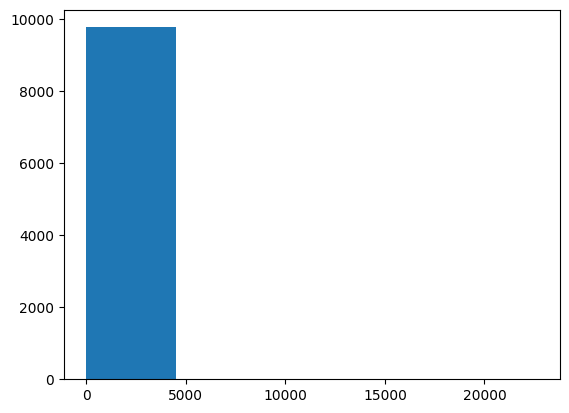

In [296]:
plt.hist(df['Sales'],bins=5)
plt.show()

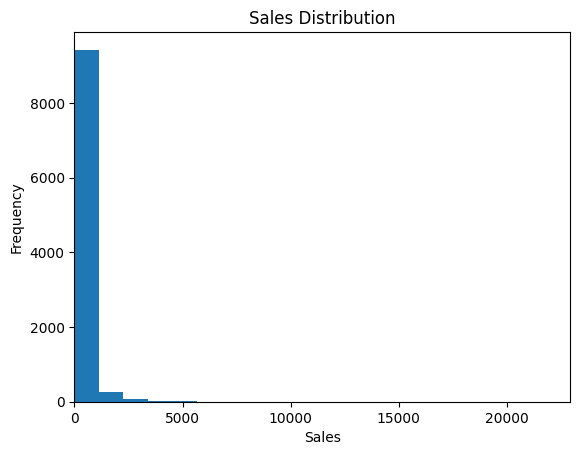

In [297]:
plt.hist(df['Sales'], bins=20)  # Increase the number of bins
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Sales Distribution')
plt.xlim(0,df['Sales'].max()+300)
plt.show()

In [298]:
df['Sales'].max()

np.float64(22638.48)

In [299]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'delivery time'],
      dtype='object')

# Outlier Removal

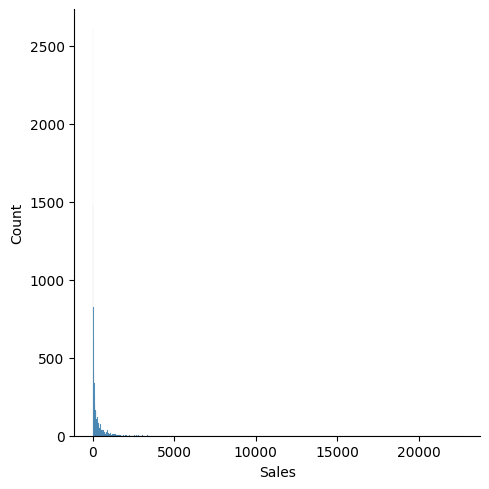

In [300]:
sns.displot(df['Sales'])
plt.show()

In [301]:
from scipy.stats import zscore
df['Z_Score'] = zscore(df['Sales'])

In [302]:
df2 = df[(df['Z_Score'] <= 3) & (df['Z_Score'] >= -3)]
df2 = df2.drop(columns=['Z_Score'])

In [303]:
df2.shape

(9677, 19)

In [304]:
df2=df2.sort_values(by='Order Date')
df2

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,delivery time
7980,7981,CA-2015-103800,2015-01-03,2015-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095.0,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,4 days
741,742,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,4 days
740,741,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,4 days
739,740,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,4 days
1759,1760,CA-2015-141817,2015-01-05,2015-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143.0,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,7 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,909,CA-2018-143259,2018-12-30,2019-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009.0,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,4 days
1296,1297,CA-2018-115427,2018-12-30,2019-01-03,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,California,94533.0,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,4 days
1297,1298,CA-2018-115427,2018-12-30,2019-01-03,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,California,94533.0,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,4 days
5091,5092,CA-2018-156720,2018-12-30,2019-01-03,Standard Class,JM-15580,Jill Matthias,Consumer,United States,Loveland,Colorado,80538.0,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,4 days


## Monthly Sales Trend

In [305]:
df2.set_index('Order Date',inplace=True)
df_monthly= df2['Sales'].resample('M').sum()

In [306]:
df_monthly

Order Date
2015-01-31    11631.8870
2015-02-28     4519.8920
2015-03-31    29067.3870
2015-04-30    23742.8050
2015-05-31    20928.3730
2015-06-30    31056.5596
2015-07-31    23416.3090
2015-08-31    27117.5365
2015-09-30    46874.6278
2015-10-31    28717.4410
2015-11-30    60271.9247
2015-12-31    52503.9305
2016-01-31    10965.3936
2016-02-29     9409.4310
2016-03-31    22834.4384
2016-04-30    30341.4985
2016-05-31    21618.4265
2016-06-30    20548.9980
2016-07-31    26298.6090
2016-08-31    30938.3822
2016-09-30    55821.4720
2016-10-31    28558.3075
2016-11-30    58632.3575
2016-12-31    62168.5292
2017-01-31    18542.4910
2017-02-28    14228.8650
2017-03-31    29905.9550
2017-04-30    29579.8370
2017-05-31    36080.1820
2017-06-30    32223.7580
2017-07-31    33090.7430
2017-08-31    27655.1443
2017-09-30    59094.5873
2017-10-31    32147.1970
2017-11-30    63160.9468
2017-12-31    80707.3810
2018-01-31    24868.6020
2018-02-28    19920.9974
2018-03-31    39463.5428
2018-04-30    

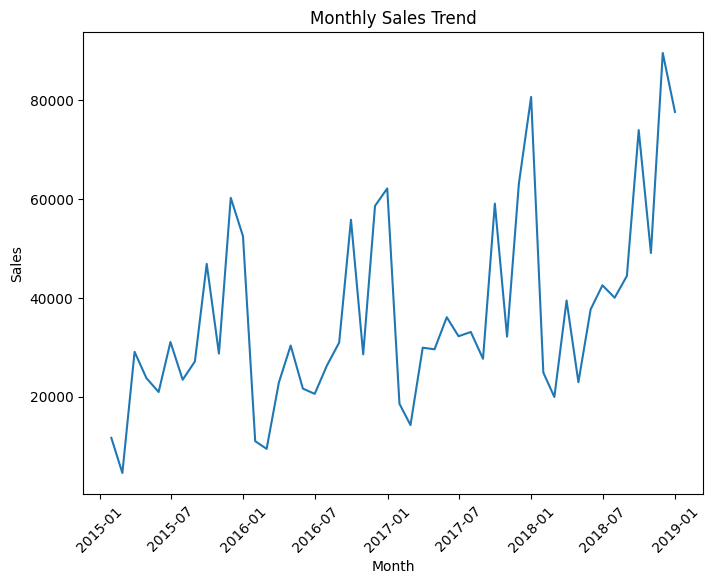

In [307]:
plt.figure(figsize=(8,6))
plt.plot(df_monthly)
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales Trend')
plt.show()

In [308]:
df_monthly

Order Date
2015-01-31    11631.8870
2015-02-28     4519.8920
2015-03-31    29067.3870
2015-04-30    23742.8050
2015-05-31    20928.3730
2015-06-30    31056.5596
2015-07-31    23416.3090
2015-08-31    27117.5365
2015-09-30    46874.6278
2015-10-31    28717.4410
2015-11-30    60271.9247
2015-12-31    52503.9305
2016-01-31    10965.3936
2016-02-29     9409.4310
2016-03-31    22834.4384
2016-04-30    30341.4985
2016-05-31    21618.4265
2016-06-30    20548.9980
2016-07-31    26298.6090
2016-08-31    30938.3822
2016-09-30    55821.4720
2016-10-31    28558.3075
2016-11-30    58632.3575
2016-12-31    62168.5292
2017-01-31    18542.4910
2017-02-28    14228.8650
2017-03-31    29905.9550
2017-04-30    29579.8370
2017-05-31    36080.1820
2017-06-30    32223.7580
2017-07-31    33090.7430
2017-08-31    27655.1443
2017-09-30    59094.5873
2017-10-31    32147.1970
2017-11-30    63160.9468
2017-12-31    80707.3810
2018-01-31    24868.6020
2018-02-28    19920.9974
2018-03-31    39463.5428
2018-04-30    

In [309]:
df_monthly.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 48 entries, 2015-01-31 to 2018-12-31
Freq: ME
Series name: Sales
Non-Null Count  Dtype  
--------------  -----  
48 non-null     float64
dtypes: float64(1)
memory usage: 768.0 bytes


In [310]:
type(df_monthly.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [311]:
df_monthly.head()

Order Date
2015-01-31    11631.887
2015-02-28     4519.892
2015-03-31    29067.387
2015-04-30    23742.805
2015-05-31    20928.373
Freq: ME, Name: Sales, dtype: float64

In [312]:
df_monthly.index = pd.to_datetime(df_monthly.index)

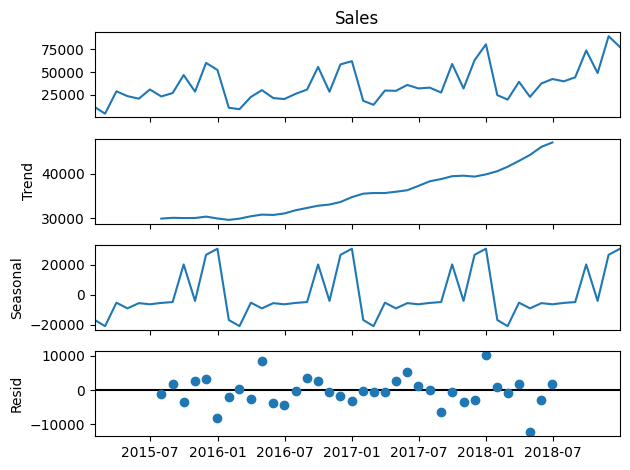

In [313]:
from statsmodels.tsa.seasonal import seasonal_decompose
ms = df_monthly #As df_monthly is a series, we cannot pass the column name as we do with a dataframe
decomposition = seasonal_decompose(ms, model='additive', period=12)

decomposition.plot()
plt.show()

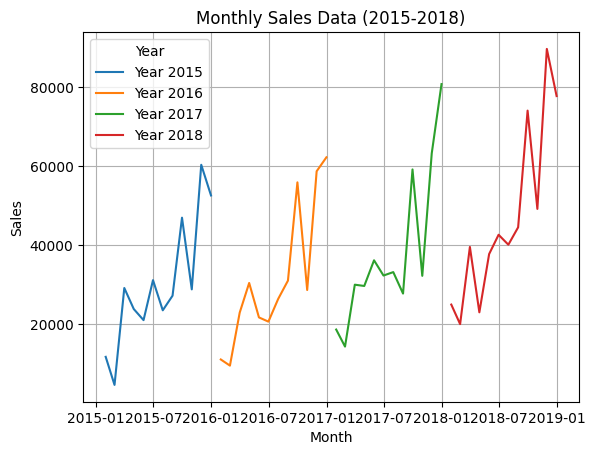

In [314]:
for i in range(2015, 2019):
    plt.plot(df_monthly[df_monthly.index.year == i], label=f'Year {i}')

plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales Data (2015-2018)')
plt.legend(title='Year')
plt.grid(True)
plt.show()

# Splitting the Dataset

In [315]:
df_monthly.shape

(48,)

In [316]:
train=df_monthly.iloc[:36]
test=df_monthly.iloc[36:]

In [317]:
train

Order Date
2015-01-31    11631.8870
2015-02-28     4519.8920
2015-03-31    29067.3870
2015-04-30    23742.8050
2015-05-31    20928.3730
2015-06-30    31056.5596
2015-07-31    23416.3090
2015-08-31    27117.5365
2015-09-30    46874.6278
2015-10-31    28717.4410
2015-11-30    60271.9247
2015-12-31    52503.9305
2016-01-31    10965.3936
2016-02-29     9409.4310
2016-03-31    22834.4384
2016-04-30    30341.4985
2016-05-31    21618.4265
2016-06-30    20548.9980
2016-07-31    26298.6090
2016-08-31    30938.3822
2016-09-30    55821.4720
2016-10-31    28558.3075
2016-11-30    58632.3575
2016-12-31    62168.5292
2017-01-31    18542.4910
2017-02-28    14228.8650
2017-03-31    29905.9550
2017-04-30    29579.8370
2017-05-31    36080.1820
2017-06-30    32223.7580
2017-07-31    33090.7430
2017-08-31    27655.1443
2017-09-30    59094.5873
2017-10-31    32147.1970
2017-11-30    63160.9468
2017-12-31    80707.3810
Freq: ME, Name: Sales, dtype: float64

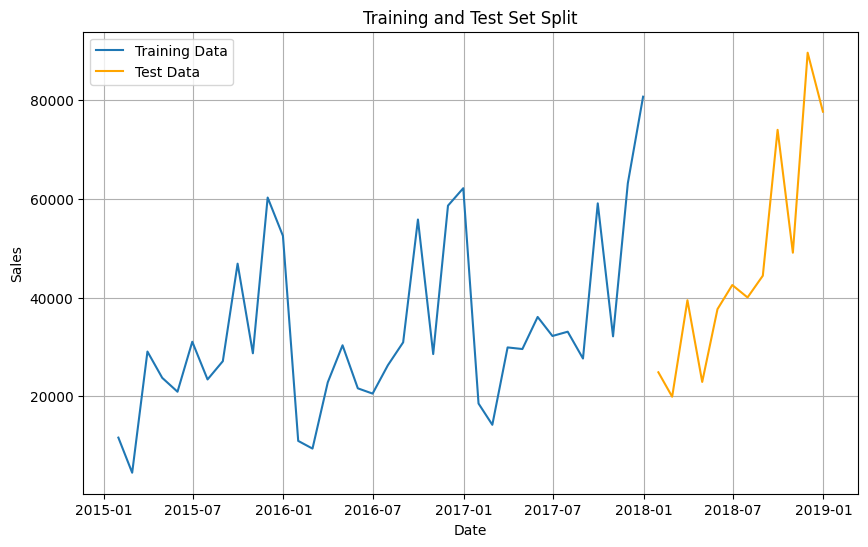

In [318]:
plt.figure(figsize=(10, 6))

plt.plot(train.index, train.values, label='Training Data')
plt.plot(test.index, test.values, label='Test Data', color='orange')

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Training and Test Set Split')
plt.legend()
plt.grid()
plt.show()

#  Stationarity and ACF, PACF plots

In [319]:
df_monthly=df_monthly.reset_index()
from statsmodels.tsa.stattools import adfuller

print("Statistical Tests: Dickey-Fuller Test")

adf_result = adfuller(train)

print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

if adf_result[1] <= 0.05:
    print("Reject the null hypothesis - The time series is stationary.")
else:
    print("Fail to reject the null hypothesis - The time series is non-stationary.")

Statistical Tests: Dickey-Fuller Test
ADF Statistic: -3.324188322215378
p-value: 0.013831275639918032
Reject the null hypothesis - The time series is stationary.


In [320]:
print(f"Train length:{train.shape}\nTest length:{test.shape}")

Train length:(36,)
Test length:(12,)


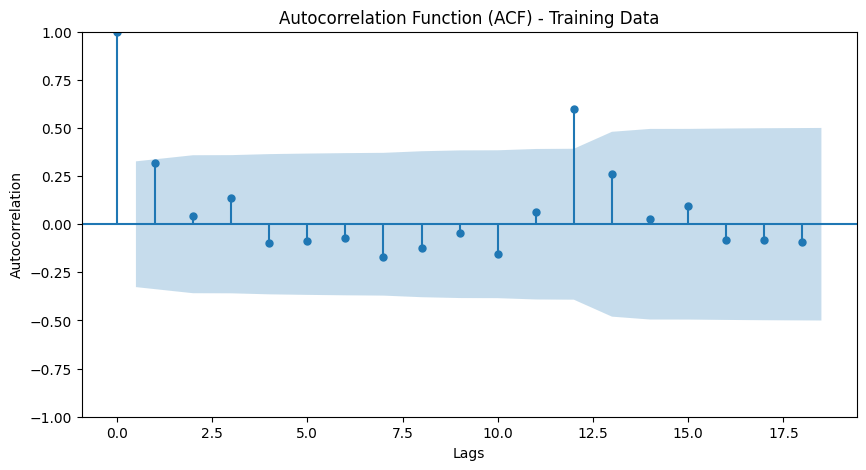

In [321]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(10, 5))
plot_acf(train, ax=plt.gca(), lags=18)

plt.title('Autocorrelation Function (ACF) - Training Data')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

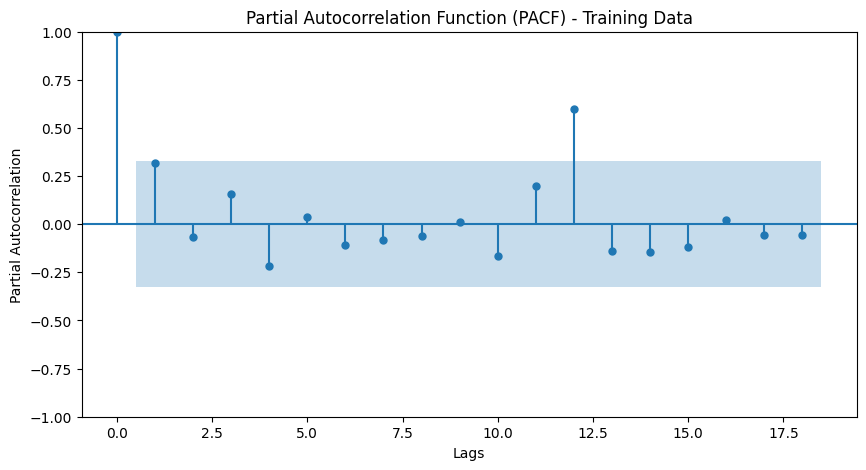

In [322]:
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plot_pacf(train, ax=plt.gca(), lags=18, method='ywm')

plt.title('Partial Autocorrelation Function (PACF) - Training Data')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.show()

Auto-Regressive (AR) Order:

**PACF Analysis**: The AR order is typically the lag number at which the PACF values drop to near-zero. For the provided PACF values, the AR order could be around 12, where the PACF values start stabilizing.

Moving Average (MA) Order:

**ACF Analysis**: The MA order is typically the lag number at which the ACF values drop to near-zero. For the provided ACF values, the MA order could be around 12, where the ACF values start stabilizing.

# ARIMA Model

In [323]:
from statsmodels.tsa.arima.model import ARIMA

arma_model = ARIMA(train, order=(1, 0, 1))
results = arma_model.fit()

In [324]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -399.940
Date:                Sun, 18 Jan 2026   AIC                            807.879
Time:                        23:07:55   BIC                            814.213
Sample:                    01-31-2015   HQIC                           810.090
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.318e+04   3862.771      8.589      0.000    2.56e+04    4.07e+04
ar.L1         -0.2001      0.482     -0.415      0.678      -1.144       0.744
ma.L1          0.6128      0.337      1.818      0.069      -0.048       1.273
sigma2      2.678e+08      0.143   1.88e+09      0.000    2.68e+08    2.68e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 5.25
Prob(Q):                              0.90   Prob(JB):                         0.07
Heteroskedasticity (H):               1.56   Skew:                             0.93
Prob(H) (two-sided):                  0.45   Kurtosis:                         2.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.49e+26. Standard errors may be unstable.
"""

In [325]:
pred=results.predict(start=36,end=47,dynamic=True)
print(pred)

2018-01-31    42175.811068
2018-02-28    31377.604710
2018-03-31    33537.989996
2018-04-30    33105.764084
2018-05-31    33192.239048
2018-06-30    33174.938097
2018-07-31    33178.399479
2018-08-31    33177.706964
2018-09-30    33177.845515
2018-10-31    33177.817795
2018-11-30    33177.823341
2018-12-31    33177.822231
Freq: ME, Name: predicted_mean, dtype: float64


In [326]:
df_monthly.set_index('Order Date', inplace=True)

<Axes: xlabel='Order Date'>

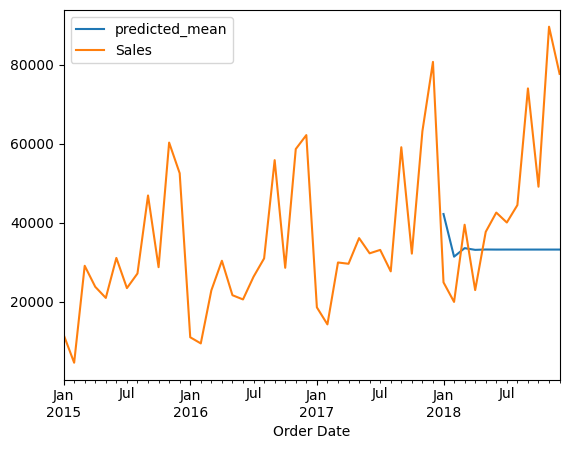

In [327]:
pred.plot(legend=True)
df_monthly['Sales'].plot(legend=True)

In [328]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test, pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 661238671.3094931


In [329]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test, pred)

print(f'Mean Absolute Error (MAE): {mae}')

Mean Absolute Error (MAE): 19541.195466402565


# SARIMA

In [330]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


sarima_model = SARIMAX(train,
                       order=(1, 0, 1),
                       seasonal_order=(1,0 , 1, 12))

results_sarima = sarima_model.fit()
results_sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   36
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                -395.508
Date:                            Sun, 18 Jan 2026   AIC                            801.015
Time:                                    23:07:55   BIC                            808.933
Sample:                                01-31-2015   HQIC                           803.779
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9259      0.230      4.024      0.000       0.475       1.377
ma.L1         -0.5117      0.893     -0.573      0.567      -2.262       1.239
ar.S.L12       0.7302      1.458      0.501      0.617      -2.128       3.588
ma.S.L12      -0.1167      2.812     -0.041      0.967      -5.628       5.395
sigma2      3.077e+08   6.39e-09   4.81e+16      0.000    3.08e+08    3.08e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 0.01
Prob(Q):                              0.81   Prob(JB):                         0.99
Heteroskedasticity (H):               0.69   Skew:                             0.01
Prob(H) (two-sided):                  0.53   Kurtosis:                         3.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.52e+33. Standard errors may be unstable.
"""

In [331]:
pred1=results_sarima.predict(start=36,end=47,dynamic=True)
print(pred1)

2018-01-31    36126.382314
2018-02-28    31536.589745
2018-03-31    40701.449002
2018-04-30    39475.939210
2018-05-31    41410.700426
2018-06-30    37760.081132
2018-07-31    37432.377474
2018-08-31    33349.515255
2018-09-30    53568.675425
2018-10-31    33963.604920
2018-11-30    54546.961517
2018-12-31    64677.470441
Freq: ME, Name: predicted_mean, dtype: float64


<Axes: xlabel='Order Date'>

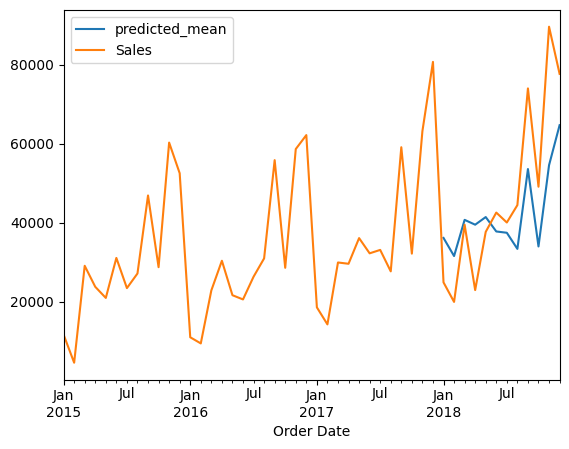

In [332]:
pred1.plot(legend=True)
df_monthly['Sales'].plot(legend=True)

In [333]:
mse1 = mean_squared_error(test, pred1)
print(f"Mean Squared Error: {mse1}")

Mean Squared Error: 229058546.82578278


In [334]:
mae1 = mean_absolute_error(test, pred1)
print(f'Mean Absolute Error (MAE): {mae1}')

Mean Absolute Error (MAE): 12209.068061190565


# PMDARIMA

In [335]:
from pmdarima import auto_arima

import warnings
warnings.filterwarnings('ignore')

In [336]:
stepwise_fit = auto_arima(train, trace=True,max_p=13, max_q=13, start_p=0, start_q=0,
                          seasonal=True,
                          m=12,
                          suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=485.949, Time=0.07 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=482.368, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=483.142, Time=0.03 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=483.628, Time=0.04 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=484.063, Time=0.04 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=483.954, Time=0.02 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=481.450, Time=0.02 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=483.146, Time=0.04 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.19 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=483.465, Time=0.02 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=inf, Time=0.06 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=482.064, Time=0.01 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=inf, Time=0.10 sec
 ARIMA(1,1,0)(0,1,0)[12] intercept   : AIC=483.429, Time=0.02 sec

Best model:  ARIMA(1,1,0)(0,1,0)[12]        

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   36
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -238.725
Date:                            Sun, 18 Jan 2026   AIC                            481.450
Time:                                    23:07:56   BIC                            483.721
Sample:                                01-31-2015   HQIC                           482.021
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2139      0.155     -1.382      0.167      -0.517       0.089
sigma2       5.92e+07   2.52e-10   2.35e+17      0.000    5.92e+07    5.92e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.81   Jarque-Bera (JB):                 1.06
Prob(Q):                              0.37   Prob(JB):                         0.59
Heteroskedasticity (H):               0.99   Skew:                             0.20
Prob(H) (two-sided):                  0.99   Kurtosis:                         2.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.2e+33. Standard errors may be unstable.
"""

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


pmd_model = SARIMAX(train,
                       order=(1, 1, 0),
                       seasonal_order=(0, 1, 0, 12))

results_pmd = pmd_model.fit()
results_pmd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   36
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -238.725
Date:                            Sun, 18 Jan 2026   AIC                            481.450
Time:                                    23:07:56   BIC                            483.721
Sample:                                01-31-2015   HQIC                           482.021
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2139      0.155     -1.382      0.167      -0.517       0.089
sigma2       5.92e+07   2.52e-10   2.35e+17      0.000    5.92e+07    5.92e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.81   Jarque-Bera (JB):                 1.06
Prob(Q):                              0.37   Prob(JB):                         0.59
Heteroskedasticity (H):               0.99   Skew:                             0.20
Prob(H) (two-sided):                  0.99   Kurtosis:                         2.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.2e+33. Standard errors may be unstable.
"""

In [338]:
pred2=results_pmd.predict(start=36,end=47,dynamic=True)
print(pred2)

2018-01-31    34084.479170
2018-02-28    30411.896949
2018-03-31    45951.864552
2018-04-30    45655.077703
2018-05-31    52149.148626
2018-06-30    48294.066682
2018-07-31    49160.764609
2018-08-31    43725.227316
2018-09-30    75164.657181
2018-10-31    48217.269690
2018-11-30    79231.018889
2018-12-31    96777.453218
Freq: ME, Name: predicted_mean, dtype: float64


<Axes: xlabel='Order Date'>

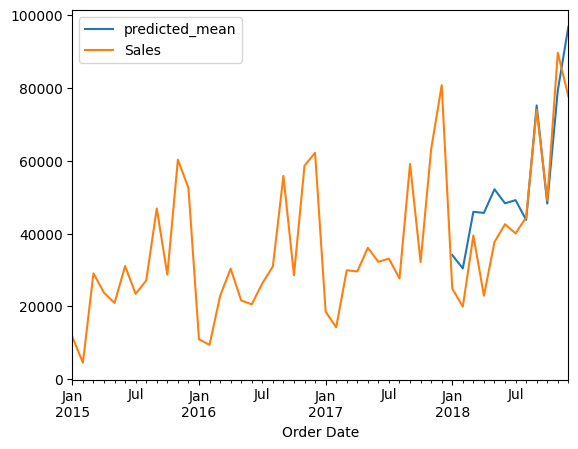

In [339]:
pred2.plot(legend=True)
df_monthly['Sales'].plot(legend=True)

In [340]:
from sklearn.metrics import mean_squared_error

mse2 = mean_squared_error(test, pred2)
print(f"Mean Squared Error: {mse2}")

Mean Squared Error: 129688679.62888004


In [341]:
from sklearn.metrics import mean_absolute_error

mae2 = mean_absolute_error(test, pred2)

print(f'Mean Absolute Error (MAE): {mae2}')

Mean Absolute Error (MAE): 9213.387999514984


<Axes: xlabel='Order Date'>

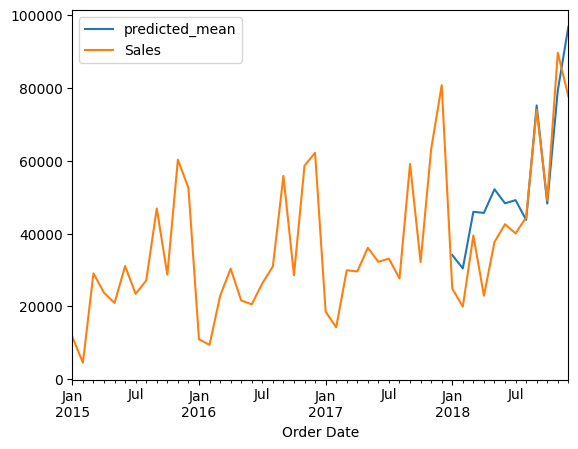

In [342]:
pred2.plot(legend=True)
df_monthly['Sales'].plot(legend=True)

# Fb Prophet

In [343]:
from prophet import Prophet
prophet_train=train.reset_index()
prophet_test=test.reset_index()

In [344]:
prophet_train.columns = ['ds', 'y']
prophet_test.columns = ['ds', 'y']

In [345]:
modelfb = Prophet()
modelfb.fit(prophet_train)

23:07:57 - cmdstanpy - INFO - Chain [1] start processing
23:07:57 - cmdstanpy - INFO - Chain [1] done processing


In [346]:
future = prophet_test[['ds']]
pred3 = modelfb.predict(future)

In [347]:
pred3.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-31,40166.340535,19360.601708,26736.151110,40159.877011,40173.980778,-17179.172230,-17179.172230,-17179.172230,-17179.172230,-17179.172230,-17179.172230,0.0,0.0,0.0,22987.168305
1,2018-02-28,40586.565166,14336.568302,21729.328877,40566.364547,40612.469395,-22377.331879,-22377.331879,-22377.331879,-22377.331879,-22377.331879,-22377.331879,0.0,0.0,0.0,18209.233287
2,2018-03-31,41051.813865,34877.620906,42256.690173,41012.797448,41101.038928,-2534.255087,-2534.255087,-2534.255087,-2534.255087,-2534.255087,-2534.255087,0.0,0.0,0.0,38517.558777
3,2018-04-30,41502.054540,32472.497551,39815.817835,41437.826403,41579.826002,-5143.151878,-5143.151878,-5143.151878,-5143.151878,-5143.151878,-5143.151878,0.0,0.0,0.0,36358.902662
4,2018-05-31,41967.303239,31683.371003,38971.248660,41876.451759,42081.581800,-6707.499251,-6707.499251,-6707.499251,-6707.499251,-6707.499251,-6707.499251,0.0,0.0,0.0,35259.803988


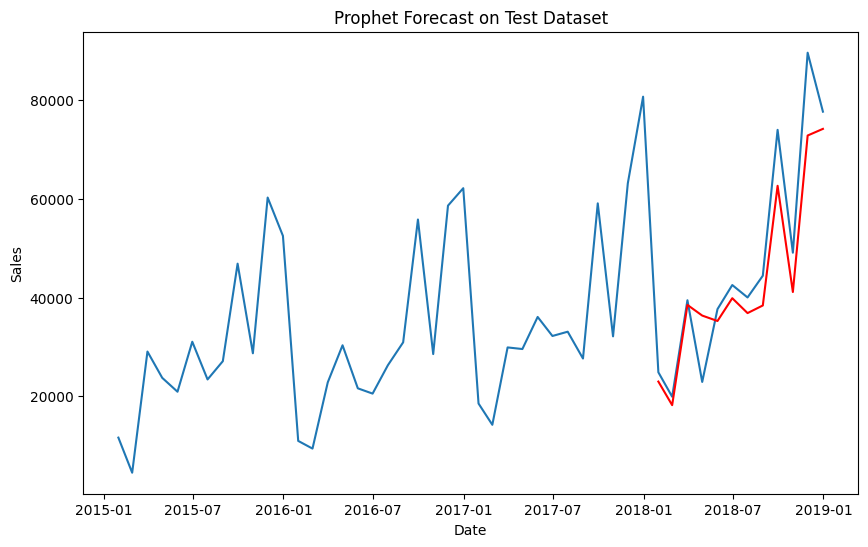

In [348]:
plt.figure(figsize=(10, 6))
plt.plot(df_monthly)
plt.plot(pred3['ds'], pred3['yhat'], color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Prophet Forecast on Test Dataset')
plt.show()

In [349]:
mse3 = mean_squared_error(test,pred3['yhat'])
print(f"Mean Squared Error: {mse3}")

Mean Squared Error: 61082874.77336198


In [350]:
from sklearn.metrics import mean_absolute_error

mae3 = mean_absolute_error(test, pred3['yhat'])

print(f'Mean Absolute Error (MAE): {mae3}')

Mean Absolute Error (MAE): 5984.688078225918


In [351]:
from sklearn.metrics import r2_score


y_true = test
y_pred = pred3['yhat']

r2 = r2_score(y_true, y_pred)

n = len(y_true)
k = 1

adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

print(f'R² Score: {r2}')
print(f'Adjusted R² Score: {adjusted_r2}')


R² Score: 0.8670066686221002
Adjusted R² Score: 0.8537073354843102


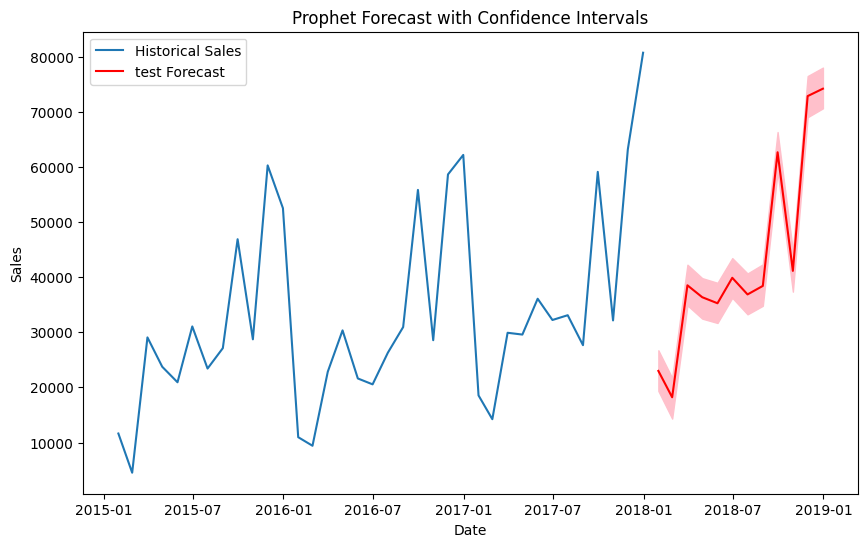

In [352]:
plt.figure(figsize=(10, 6))
plt.plot(prophet_train['ds'], prophet_train['y'], label='Historical Sales')
plt.plot(pred3['ds'], pred3['yhat'], label='test Forecast', color='red')
plt.fill_between(pred3['ds'], pred3['yhat_lower'], pred3['yhat_upper'], color='pink')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Prophet Forecast with Confidence Intervals')
plt.legend()
plt.show()

# Choosing a Model

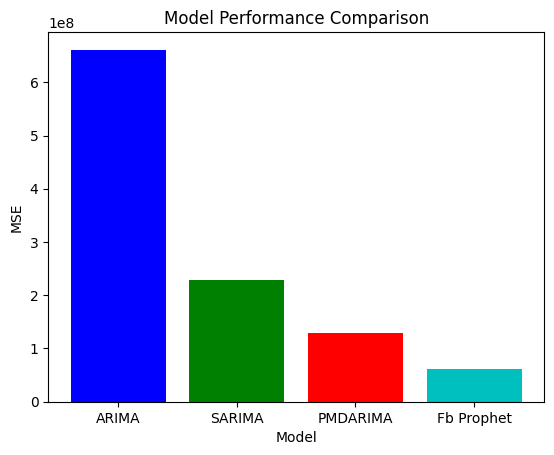

In [353]:
plt.bar(['ARIMA','SARIMA','PMDARIMA','Fb Prophet'],[mse,mse1,mse2,mse3],color=['b', 'g', 'r', 'c'])
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('Model Performance Comparison')
plt.show()

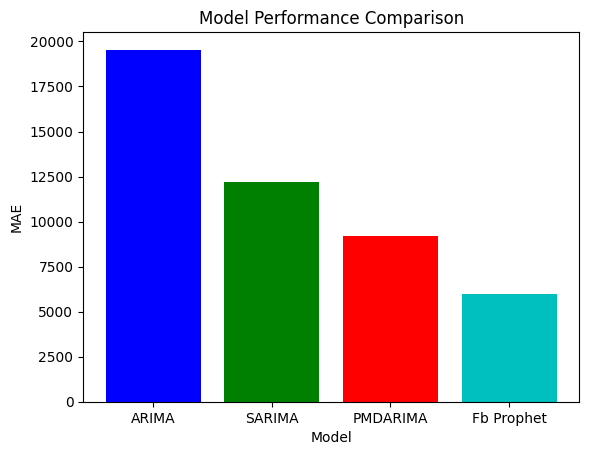

In [354]:
plt.bar(['ARIMA','SARIMA','PMDARIMA','Fb Prophet'],[mae,mae1,mae2,mae3],color=['b', 'g', 'r', 'c'])
plt.xlabel('Model')
plt.ylabel('MAE')
plt.title('Model Performance Comparison')
plt.show()

# Future Forecast with Fb Prophet

In [355]:
last_date = prophet_test['ds'].max()
last_date

Timestamp('2018-12-31 00:00:00')

In [356]:
future_dates = pd.date_range(start=last_date, periods=7, freq='M')[1:]
future_df = pd.DataFrame({'ds': future_dates})

In [357]:
future_df

,ds
0,2019-01-31
1,2019-02-28
2,2019-03-31
3,2019-04-30
4,2019-05-31
5,2019-06-30


In [358]:
future_6months = future_df[['ds']]
pred_future = modelfb.predict(future_6months)
pred_future.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-31,45644.268758,24659.410116,31913.884915,45637.361051,45651.536024,-17445.205307,-17445.205307,-17445.205307,-17445.205307,-17445.205307,-17445.205307,0.0,0.0,0.0,28199.063451
1,2019-02-28,46064.493389,19057.903760,26684.371441,46042.610555,46087.404495,-22979.017939,-22979.017939,-22979.017939,-22979.017939,-22979.017939,-22979.017939,0.0,0.0,0.0,23085.475450
2,2019-03-31,46529.742087,42816.182005,50216.808847,46487.965284,46573.047554,102.178578,102.178578,102.178578,102.178578,102.178578,102.178578,0.0,0.0,0.0,46631.920665
3,2019-04-30,46979.982763,36382.172267,43812.111879,46914.679667,47048.299406,-6985.285345,-6985.285345,-6985.285345,-6985.285345,-6985.285345,-6985.285345,0.0,0.0,0.0,39994.697418
4,2019-05-31,47445.231462,36220.015628,43347.486852,47346.206092,47541.812853,-7789.788757,-7789.788757,-7789.788757,-7789.788757,-7789.788757,-7789.788757,0.0,0.0,0.0,39655.442705


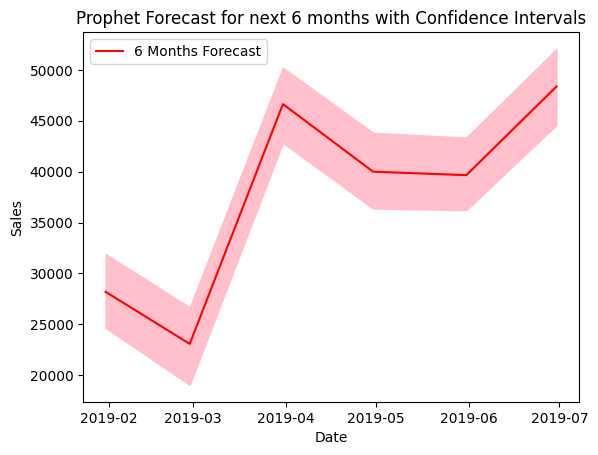

In [359]:
plt.plot(pred_future['ds'], pred_future['yhat'], label='6 Months Forecast', color='red')
plt.fill_between(pred_future['ds'], pred_future['yhat_lower'], pred_future['yhat_upper'], color='pink')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Prophet Forecast for next 6 months with Confidence Intervals')
plt.legend()
plt.show()

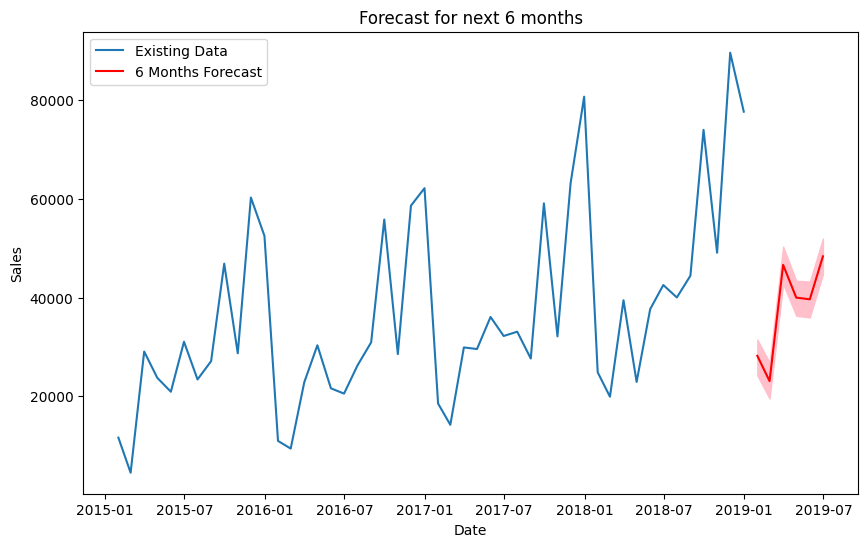

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(df_monthly,label='Existing Data')
plt.plot(pred_future['ds'], pred_future['yhat'], label='6 Months Forecast', color='red')
plt.fill_between(pred_future['ds'], pred_future['yhat_lower'], pred_future['yhat_upper'], color='pink')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title("Forecast for next 6 months")
plt.legend()
plt.show()